In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import dlib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [58]:
model_path = 'gdrive/MyDrive/facenet_keras.h5'
model = load_model(model_path)

In [59]:
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [60]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  image_np = np.array(Image.open(path))
  return image_np

In [61]:
face_detector = dlib.get_frontal_face_detector()

In [78]:
img_path = 'gdrive/MyDrive/ew.jpg'
img = load_image_into_numpy_array(img_path)

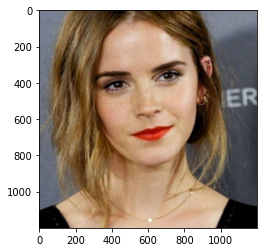

In [79]:
plt.imshow(img)

In [80]:
np.max(img)

255

In [81]:
img

array([[[121, 128, 147],
        [121, 128, 147],
        [121, 128, 147],
        ...,
        [128, 134, 150],
        [128, 134, 150],
        [128, 134, 150]],

       [[121, 128, 147],
        [121, 128, 147],
        [121, 128, 147],
        ...,
        [128, 134, 150],
        [128, 134, 150],
        [128, 134, 150]],

       [[121, 128, 147],
        [121, 128, 147],
        [121, 128, 147],
        ...,
        [128, 134, 150],
        [128, 134, 150],
        [128, 134, 150]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]]

In [84]:
rects = face_detector(img)

In [85]:
rects

rectangles[[(270, 199) (912, 841)]]

In [86]:
IMG_SIZE = (160, 160)

In [87]:
def crop_images(image, rect, expand=0.4):
    crop_img = Image.fromarray(image.copy())
    v_dist = int(abs(rect.bottom() - rect.top()) * expand / 2)
    h_dist = int(abs(rect.right() - rect.left()) * expand / 2)
    top = max(0, rect.top() - v_dist)
    bottom = min(rect.bottom()+v_dist, image.shape[0])
    left = max(0, rect.left()-h_dist)
    right = min(rect.right()+h_dist, image.shape[1])
    crop_img = crop_img.crop((left, top, right, bottom))
    return np.array(crop_img.resize(IMG_SIZE))[np.newaxis, :, :, :] / 255.

In [109]:
for rect in rects:
  crop_img = crop_images(img, rect, expand=0.2)

In [110]:
crop_img.shape

(1, 160, 160, 3)

In [111]:
np.max(crop_img)

0.9372549019607843

In [112]:
crop_img

array([[[[0.65098039, 0.5372549 , 0.41568627],
         [0.54901961, 0.43137255, 0.29411765],
         [0.52156863, 0.40392157, 0.25098039],
         ...,
         [0.47058824, 0.50980392, 0.55686275],
         [0.46666667, 0.49803922, 0.54901961],
         [0.4627451 , 0.48627451, 0.54117647]],

        [[0.65490196, 0.54117647, 0.41960784],
         [0.58823529, 0.47058824, 0.32941176],
         [0.57647059, 0.45882353, 0.30588235],
         ...,
         [0.4745098 , 0.51372549, 0.56078431],
         [0.47058824, 0.50196078, 0.55294118],
         [0.4627451 , 0.48627451, 0.54117647]],

        [[0.65098039, 0.54901961, 0.41960784],
         [0.60784314, 0.50196078, 0.35294118],
         [0.55686275, 0.44313725, 0.29411765],
         ...,
         [0.4745098 , 0.50588235, 0.55294118],
         [0.4745098 , 0.50588235, 0.55686275],
         [0.45098039, 0.47843137, 0.54117647]],

        ...,

        [[0.43921569, 0.31372549, 0.18823529],
         [0.38431373, 0.26666667, 0.13333333]

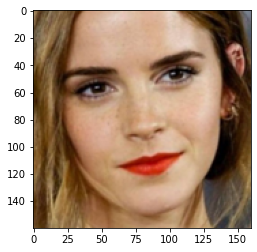

In [113]:
plt.imshow(crop_img[0])

In [114]:
result = model(crop_img)

In [115]:
result.shape

TensorShape([1, 128])

In [116]:
result

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[ 1.6690828 , -0.4403884 ,  0.11240684, -0.07591762,  0.6515102 ,
        -1.6074872 ,  1.4014131 , -0.51546234, -2.204006  ,  0.64016557,
         0.46019864,  0.39666432,  2.1311235 , -0.896345  ,  0.44543386,
         1.8102713 ,  0.4057899 , -0.6215044 , -1.5957518 ,  1.2531588 ,
        -0.35040194,  0.15155031,  1.6801971 ,  0.27975252, -0.3915464 ,
         0.7183587 ,  1.862203  , -0.45136583,  0.8471596 , -0.88195294,
        -0.45216724, -0.27195317, -0.06321996, -0.33107635, -1.1200593 ,
        -0.05866021,  0.46966946,  0.6908024 , -0.00422741, -0.34136963,
        -1.1753278 ,  0.40177995,  0.27862734,  0.75906825,  0.5916544 ,
        -0.41998416,  0.49790123, -0.03151143,  0.58206296, -0.49381462,
        -1.0512494 , -1.1567047 , -2.0584126 ,  0.9042316 , -0.01934882,
         0.33429396,  0.7704474 ,  2.4381976 ,  0.28657535,  0.1434843 ,
        -1.4198534 ,  0.50154054, -0.78757983,  1.2133889 , -0.75363934,
 